In [48]:
# Install required libraries for geospatial data handling and interactive mapping, geopandas - for geospatial data analysis and folium - for creating interactive maps
!pip install geopandas folium

In [49]:
# Mount Google Drive to access datasets stored in drive allowing seamless file reading and writing between Colab and Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/climate_nasa.csv')

# Preview the first few rows
print(data.head())
print(data.info())

                       date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   

                                                text  
0  Neat comparison I have not heard it before.\n ...  
1  An excellent way to visualise the invisible! T...  
2  Does the CO2/ghg in the troposphere affect the...  
3  excellent post! I defo feel the difference - o...  
4  Yes, and carbon dioxide does not har

Index(['date', 'likesCount', 'profileName', 'commentsCount', 'text'], dtype='object')


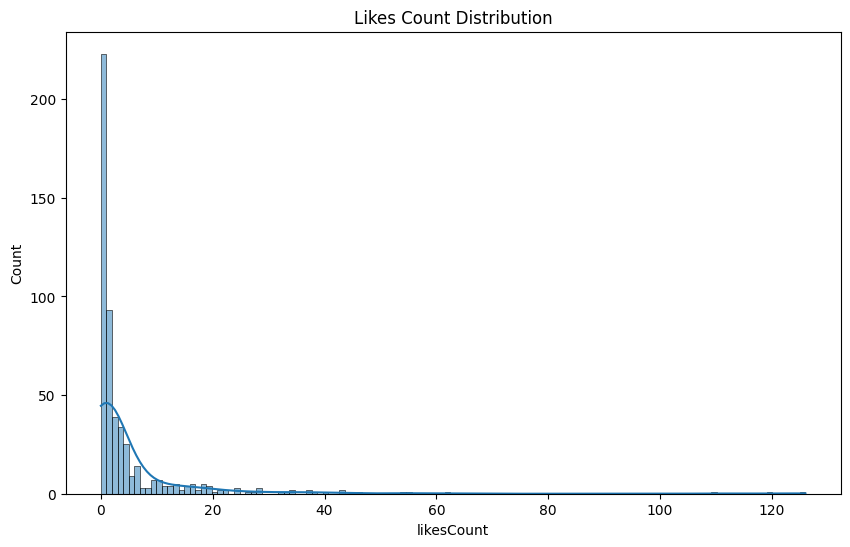

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'likesCount' is in the columns
print(data.columns)  # Print the columns in your DataFrame

# If the column name is misspelled, correct it
# For example, if it's 'likes_count', use:
# sns.histplot(data['likes_count'], kde=True)

# If the column is missing, handle the case appropriately
if 'likesCount' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['likesCount'], kde=True)
    plt.title('Likes Count Distribution')
    plt.show()
else:
    print("Column 'likesCount' not found in the dataset.")
    # Consider further actions, like checking data source or data cleaning

Plotting the distribution of 'likesCount' to visualize engagement levels



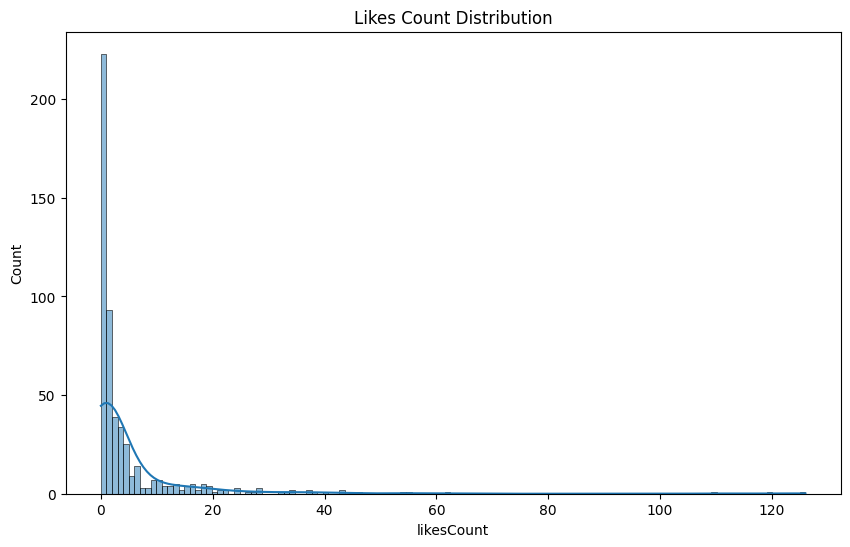

In [52]:
# Install visualization libraries for plotting and data analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of 'likesCount' to visualize engagement trends
plt.figure(figsize=(10, 6))
sns.histplot(data['likesCount'], kde=True)
plt.title('Likes Count Distribution')
plt.show()

In [53]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values with 0
data.fillna(0, inplace=True)

date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64


In [57]:
# Create a new column 'CommentLength' by calculating the length of each comment in the 'text' column
data['CommentLength'] = data['text'].astype(str).apply(len)

In [58]:
# Train a Random Forest model to predict 'likesCount' using key features
# Split the data into training and testing sets, fit the model, and evaluate with MAE

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X = data[['likesCount', 'commentsCount', 'CommentLength']]
y = data['likesCount']  # Example target (can be adjusted)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 0.41152380952380946


In [60]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R²: {r2:.2f}')

MAE: 0.40
MSE: 12.36
R²: 0.93


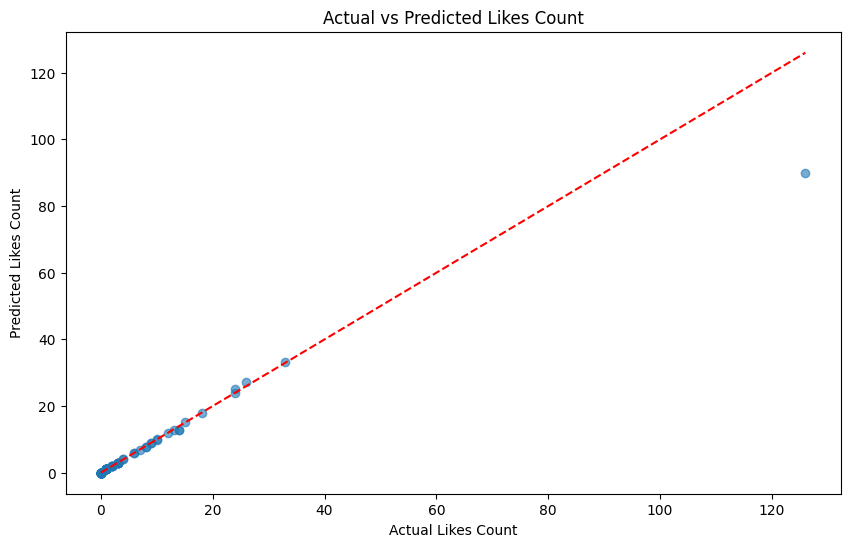

In [61]:
# Visualization - Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Likes Count')
plt.ylabel('Predicted Likes Count')
plt.title('Actual vs Predicted Likes Count')
plt.show()

In [62]:
# Hyperparameter tuning (Grid Search)
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': 10, 'n_estimators': 200}


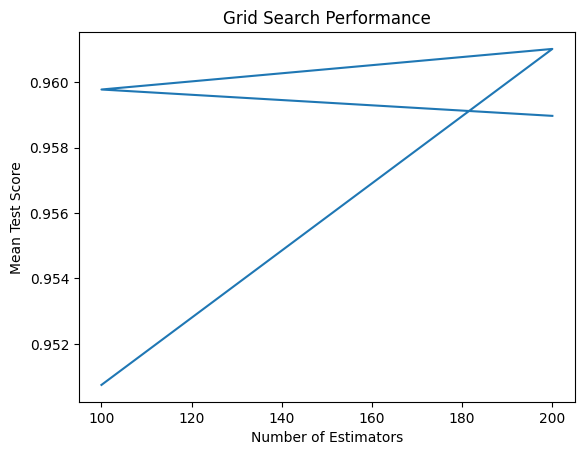

In [68]:
# Visualize Grid Search performance to evaluate different hyperparameter combinations
results = pd.DataFrame(grid.cv_results_)
plt.plot(results['param_n_estimators'], results['mean_test_score'])
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Performance')
plt.show()

In [63]:
# Use the best model for future projections
best_model = grid.best_estimator_

In [64]:
# Mock future data
future_data = pd.DataFrame({
  'likesCount': [5, 20],
  'commentsCount': [8, 15],
  'CommentLength': [120, 250]
})

future_predictions = best_model.predict(future_data)
print("Future Engagement Predictions (Likes Count):", future_predictions)

Future Engagement Predictions (Likes Count): [ 5.   19.77]


In [65]:
# Scenario Analysis Data
scenario_data = pd.DataFrame({
  'likesCount': [2, 10, 30],
  'commentsCount': [5, 20, 40],
  'CommentLength': [50, 150, 300]
})

In [66]:
# Predict scenarios using the best model
scenario_predictions = best_model.predict(scenario_data)
print("Scenario Analysis Predictions:", scenario_predictions)

Scenario Analysis Predictions: [ 2.     9.935 28.28 ]


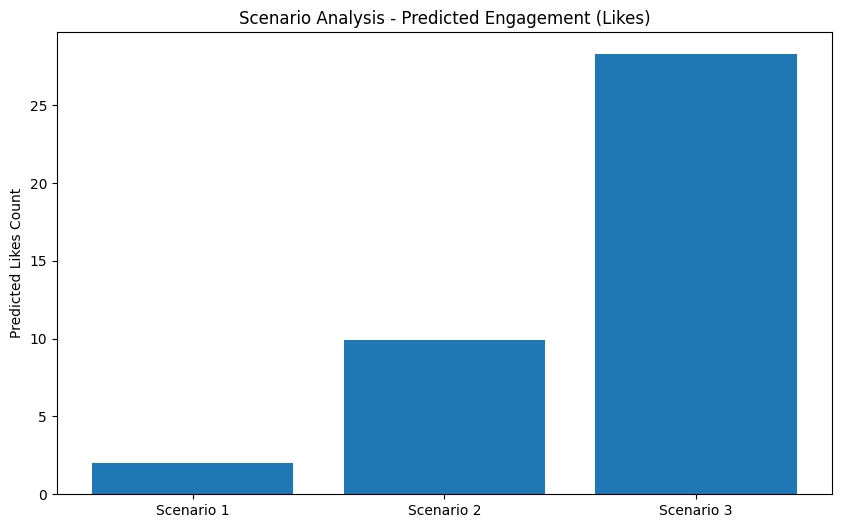

In [67]:
# Visualize scenario predictions using a bar chart to compare predicted engagement across different scenarios
plt.figure(figsize=(10, 6))
plt.bar(['Scenario 1', 'Scenario 2', 'Scenario 3'], scenario_predictions)
plt.title('Scenario Analysis - Predicted Engagement (Likes)')
plt.ylabel('Predicted Likes Count')
plt.show()